In [ ]:
!pip install tensorflow keras tqdm

In [ ]:
#Download and extract Fashion Dataset
#!wget https://github.com/LordZorgoth/apparel-practice/raw/master/train_LbELtWX.zip
#!unzip ~/Downloads/train_LbELtWX.zip

In [1]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

2023-10-11 16:15:13.508980: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-11 16:15:13.510483: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 16:15:13.531918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 16:15:13.531941: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 16:15:13.531957: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Sneaker / 7')

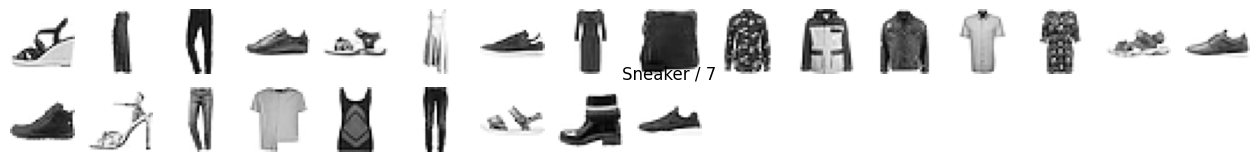

In [5]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(16,16,j)
  j+=1
  plt.imshow(X_train[i],cmap="Grays")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [6]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [7]:
X_train =X_train/255
X_test = X_test/255

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

In [9]:
cnn = keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
2813/2813 [==============================] - 8s 3ms/step - loss: 0.5693 - accuracy: 0.7856 - val_loss: 0.4149 - val_accuracy: 0.8445
Epoch 2/20
2813/2813 [==============================] - 7s 3ms/step - loss: 0.3827 - accuracy: 0.8607 - val_loss: 0.3405 - val_accuracy: 0.8732
Epoch 3/20
2813/2813 [==============================] - 7s 3ms/step - loss: 0.3305 - accuracy: 0.8814 - val_loss: 0.3327 - val_accuracy: 0.8810
Epoch 4/20
2813/2813 [==============================] - 7s 3ms/step - loss: 0.3015 - accuracy: 0.8905 - val_loss: 0.3093 - val_accuracy: 0.8881
Epoch 5/20
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2815 - accuracy: 0.8982 - val_loss: 0.2803 - val_accuracy: 0.8951
Epoch 6/20
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2658 - accuracy: 0.9020 - val_loss: 0.2786 - val_accuracy: 0.8973
Epoch 7/20
2813/2813 [==============================] - 7s 3ms/step - loss: 0.2489 - accuracy: 0.9084 - val_loss: 0.2840 - val_accuracy:

In [12]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [13]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.9013


[0.3156457245349884, 0.9013000130653381]

Text(0.5, 1.0, 'Trouser / 1')

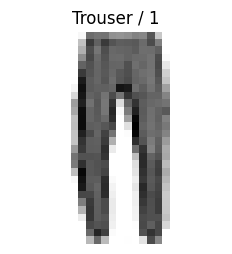

In [16]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(X_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

90
313/313 [==============================] - 0s 1ms/step
The predicted value is 5
Sandal


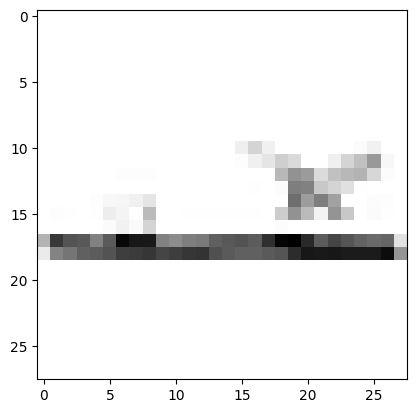

In [26]:
import random

r = random.randint(0,100)
print(r)
plt.size()
plt.imshow(X_test[r], cmap = 'Grays')

prediction = cnn.predict(X_test)
output = np.argmax(prediction[r])
print(f"The predicted value is {output}")
print(class_labels[output])